Paul O'Leary

Comp 4449 Capstone

11/19/2021

With Leigh Ann Kudloff

# "Suspense at the Preserve!"

## Initial Exploratory Notebook!

For the final Visualizations used, see:  **PJO_Final_Visualizations.ipynb**

For final model runs, see:  **PJO_Final_Model.ipynb**

Other included PDF of a notebook:  **PJO_Final_2.pdf** , which contains numerous passes through feature extraction and model builds with various cslices of the data.  The code would take many hours to run.

This was my beginnings notebook, in which all manner of code was tried, abandoned, reworked, abandoned again.  This notebook should run, but it will take some time.  In other portions of code, I have commented out most of the pieces that will run for hours.  

Due to constant jeapordy to the kernel on my - apparently - underpowered MacBook Pro, in subsequent notebooks, I began saving CSV and PICKLE files to save from having to rerun long prep work.  (My MacBook is 2.3G Quad-Core I7, 16G.  Seemed beefy enough when I purchased it 18 months ago.  Not so.)

This notebook has:

- Initial Exploration
- Some initial cleanup on the Meta file - Leigh Ann handled more hardcore cleanup!
- Converts all MP3 files to MONO WAV files
- Updates the Meta file with locations of the MP3s and WAVs.
- Runs some initial attempts at feature extraction and model builds.

## Code not included in the submission

- Other model builds, such as Clustering.  Either the results were terrible, or I couldn't get them to work at all.
- Keras Tuner attempts.  Spent a lot of time trying to get that to work, without any results.  Manual tuning of the LSTM was fairly successful, but, of course, required many reruns.
- Attempts to run Grid Searches on the Random Forest, even with minimal numbers of parameters blew up my kernel.  This was manually tuned as well, again with fair results.

**Note to Dr. Narayanappa:**  You asked about making this code public.  I am OK with that.  But I am aware that the use of Jupyter Notebook has made my coding a bit sloppy.  While it may be more readable, in most regards, it also contributes to repeated code, lots of one line cells, and many many stops and restarts.  Due to the many issues that I had with kernels blowing up on my machine, I did not have time to clean up the code as much as I would have liked.  Apologies for that.  To a certain degree, it makes me want to just go back to working in Atom or VS Code, understanding that there are issues there as well.

Regardless, Thank You for an enjoyable Quarter.  I learned a lot - especially that I still have so much more to learn.  

In [1]:
# Packages carried throughout testing.  All were used at one point or another.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import timeit
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import librosa 
import librosa.display
from scipy.io import wavfile as wav
import os, sys, cv2, matplotlib.pyplot as plt, numpy as np, shutil, itertools, pickle, pandas as pd, seaborn as sn, math, time
from random import seed, random, randint
from scipy.spatial import distance
import random
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from mpl_toolkits.mplot3d import Axes3D
import soundfile as sf
from tqdm import tqdm
from keras import backend as K
from keras.models import Model, load_model, Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from pydub import AudioSegment

import tensorflow as tf

from scipy import spatial


In [2]:
# Get the files

allBirds = pd.read_csv("AllBirdsv4.csv")
testBirds = pd.read_csv("Test Birds Location.csv")

In [3]:
allBirds.Quality.value_counts()

B           930
A           665
C           329
D            84
no score     54
E            19
Name: Quality, dtype: int64

In [4]:
testBirds

,ID,X,Y
0,1,140,119
1,2,63,153
2,3,70,136
3,4,78,150
4,5,60,90
5,6,126,103
6,7,71,121
7,8,78,62
8,9,61,145
9,10,45,39


In [5]:
import librosa
import librosa.display

/Users/pauloleary/opt/miniconda3/envs/CAP_env/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


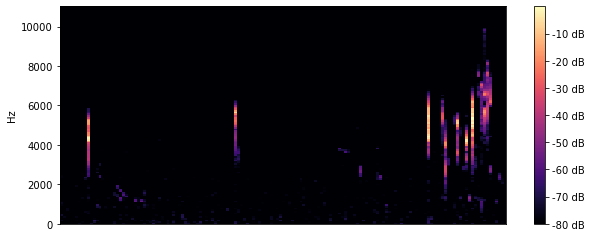

In [6]:
BP_1201 = 'All Birds/Rose-Crested-Blue-Pipit-1201.mp3'

# Load the mp3 file
signal, sr = librosa.load(BP_1201,duration=7) # sr = sampling rate
# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [7]:
signal.shape

(154350,)

In [8]:
signal

array([ 0.0118103 ,  0.02548218,  0.03042603, ..., -0.00280762,
       -0.01251221, -0.00622559], dtype=float32)

In [9]:
# That's A LOT of data in one simple melspectrogram.  154 thousand floats!!

/Users/pauloleary/opt/miniconda3/envs/CAP_env/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


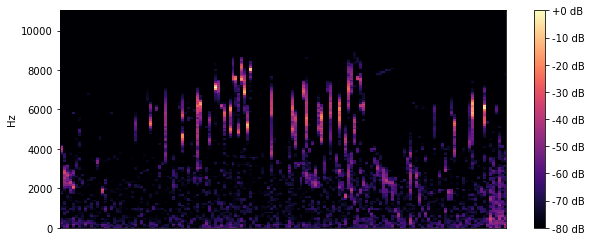

In [10]:
BP_16969='All Birds/Rose-Crested-Blue-Pipit-16969.mp3'

# Load the mp3 file
signal, sr = librosa.load(BP_16969,duration=7) # sr = sampling rate
# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()

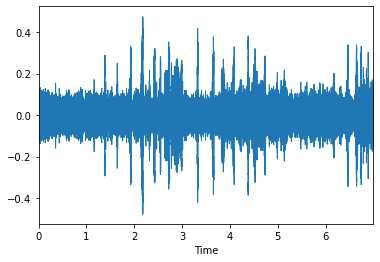

In [11]:
librosa.display.waveplot(signal, sr=sr)

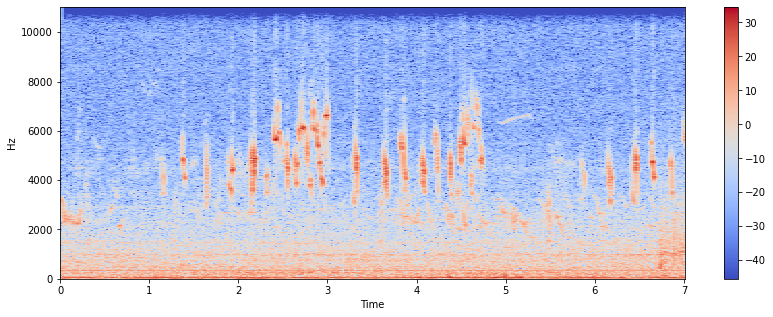

In [12]:
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [13]:
#to play audio
import IPython.display as ipd

audio_fpath = "All Birds/"
audio_clips = os.listdir(audio_fpath)
print("No. of .mp3 files in audio folder = ",len(audio_clips))

No. of .mp3 files in audio folder =  2081


In [14]:
allBirds.columns

Index(['File ID', 'English_name', 'Vocalization_type', 'Quality', 'Time',
       'Date', 'X', 'Y'],
      dtype='object')

To make some first passes at analysis, I reduced the file size.

In [15]:
# Pull out Just the RCBP and Grade A clips

# rcbp = allBirds.loc[allBirds['English_name'] == 'Rose-crested Blue Pipit']

rcbp_A = allBirds.loc[(allBirds["English_name"] == 'Rose-crested Blue Pipit') &
                               (allBirds["Quality"] == 'A')]

In [16]:
rcbp_A.iloc[0]

File ID                               406171
English_name         Rose-crested Blue Pipit
Vocalization_type                       call
Quality                                    A
Time                                    7:48
Date                                6/7/2017
X                                        125
Y                                        133
Name: 1, dtype: object

In [17]:
# OK.  Replace the name first.

rcbp_A['English_name'] = 'Rose-Crested-Blue-Pipit'

/var/folders/rd/tt57md69491f_2x627n44qj80000gn/T/ipykernel_5480/1611403851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcbp_A['English_name'] = 'Rose-Crested-Blue-Pipit'


In [18]:
rcbp_A

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
1,406171,Rose-Crested-Blue-Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-Crested-Blue-Pipit,call,A,12:00,2/8/2018,58,76
3,405548,Rose-Crested-Blue-Pipit,song,A,11:00,3/10/2018,55,125
4,401782,Rose-Crested-Blue-Pipit,song,A,6:00,6/29/2008,129,123
5,401720,Rose-Crested-Blue-Pipit,call,A,13:00,12/28/2016,132,121
6,401719,Rose-Crested-Blue-Pipit,call,A,13:00,12/28/2016,106,107
7,387404,Rose-Crested-Blue-Pipit,call,A,10:00,9/18/2017,149,115
8,377874,Rose-Crested-Blue-Pipit,song,A,7:43,6/11/2000,134,118
9,368493,Rose-Crested-Blue-Pipit,call,A,12:47,3/13/2017,89,131
10,368492,Rose-Crested-Blue-Pipit,call,A,12:45,3/13/2017,141,124


Initial tests to manipulate the file names for the corresponding MP3 files.

In [19]:
# Warnings, but it worked - figure that out.  Proceed with getting the file name

temp_id = str(rcbp_A.iloc[22]['File ID'])
temp_name = rcbp_A.iloc[22]['English_name']
filename = 'All Birds/' + temp_name + '-' + temp_id + '.mp3'

In [20]:
filename

'All Birds/Rose-Crested-Blue-Pipit-176636.mp3'

In [21]:
# Simple code to play the clips.  Commented out to not keep hearing it OVER and OVER.  
# I'm already hearing dang BLUE PIPIT (FAKE BIRD) CALLS IN MY SLEEP

# from IPython.display import *
# Audio(filename, autoplay=True)

In [22]:
allBirds

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,125
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,123
...,...,...,...,...,...,...,...,...
2076,305166,Vermillion Trillian,call,D,16:00,2/28/2016,86,144
2077,236287,Vermillion Trillian,song,D,17:10,4/12/2015,72,58
2078,236286,Vermillion Trillian,song,D,17:05,4/12/2015,40,103
2079,153963,Vermillion Trillian,call,D,14:35,11/5/2013,148,158


Code to convert the files from MP3 to WAV files and dump them in their own directory.

The main birds and testBirds files were also updated with the paths of the MP3s and WAV files.

These were commented out to keep from rerunning. 

In [23]:
# Convert the MP3s to WAV.  Try to do the whole batch at once.

In [24]:
# To convert MP3 to WAV for the KASIOS files.

# path_list = []
# path_list_mp3 = []

# for i in range(len(testBirds)):
    
    
#     # temp_id = str(i)
#     temp_id = testBirds.iloc[i]['ID']
#     file_mp3 = 'Test Birds from Kasios/' + str(temp_id) + '.mp3'
#     file_wav = 'Kasios WAV/' + str(temp_id) + '.wav'
    
#     path_list.append(file_wav)
#     path_list_mp3.append(file_mp3)
    
#     sound = AudioSegment.from_mp3(file_mp3)
#     sound = sound.set_channels(1)
#     sound.export(file_wav, format="wav")
    
    
# testBirds['mp3_path'] = path_list_mp3
# testBirds['wav_path'] = path_list

In [25]:
# path_list = []
# path_list_mp3 = []

# for i in range(len(birds)):
    
# #     temp_id = str(rcbp_A.iloc[22]['File ID'])
# #     temp_name = rcbp_A.iloc[22]['English_name']
# #     filename = 'All Birds/' + temp_name + '-' + temp_id + '.mp3'
    
    
#     # temp_id = str(i)
#     temp_id = str(birds.iloc[i]['File ID'])
#     temp_name = birds.iloc[i]['English_name']
#     file_mp3 = 'All Birds/' + temp_name + '-' + temp_id + '.mp3'
#     file_wav = 'All Birds WAV/' + temp_name + '-' + temp_id + '.wav'
    
#     path_list.append(file_wav)
#     path_list_mp3.append(file_mp3)
    
#     sound = AudioSegment.from_mp3(file_mp3)
#     sound = sound.set_channels(1)
#     sound.export(file_wav, format="wav")
    
    
# birds['mp3_path'] = path_list_mp3
# birds['wav_path'] = path_list

Now examine the Kasios test files.

In [26]:
# Now get the Kasios files.

In [27]:
# get the simple meta file - check
testBirds

,ID,X,Y
0,1,140,119
1,2,63,153
2,3,70,136
3,4,78,150
4,5,60,90
5,6,126,103
6,7,71,121
7,8,78,62
8,9,61,145
9,10,45,39


In [28]:
testBirds

,ID,X,Y
0,1,140,119
1,2,63,153
2,3,70,136
3,4,78,150
4,5,60,90
5,6,126,103
6,7,71,121
7,8,78,62
8,9,61,145
9,10,45,39


Due to the frequency with which my kernel BLEW UP on this machine, there is a lot of saving CSVs and Pickles and reloading to avoid having to rerun chunks of code.

In [29]:
# Now write this out so I can just reload it

# COMMENTED OUT AFTER IT WORKED

# testBirds.to_csv("Pauls_testBirds.csv", index=False)

Many other visualizations were explored.

/Users/pauloleary/opt/miniconda3/envs/CAP_env/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


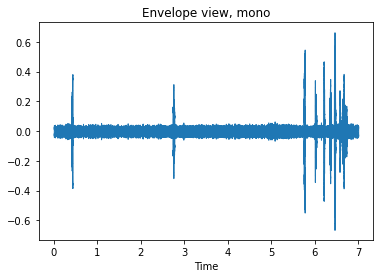

In [30]:
# y, sr = librosa.load(librosa.ex('choice'), duration=10)

signal, sr = librosa.load(BP_1201,duration=7) # sr = sampling rate

fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(signal, sr=sr, ax=ax)
ax.set(title='Envelope view, mono')
ax.label_outer()

/Users/pauloleary/opt/miniconda3/envs/CAP_env/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/pauloleary/opt/miniconda3/envs/CAP_env/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/pauloleary/opt/miniconda3/envs/CAP_env/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


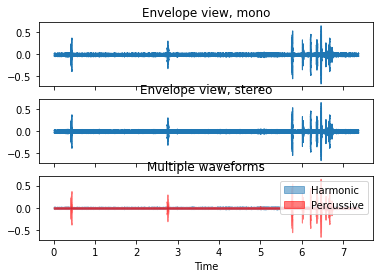

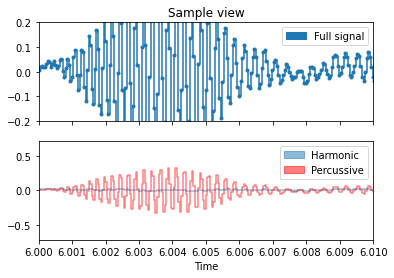

In [31]:
import matplotlib.pyplot as plt
y, sr = librosa.load(BP_1201, duration=10)
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

y, sr = librosa.load(BP_1201, mono=False, duration=10)
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')
ax[1].label_outer()

y, sr = librosa.load(BP_1201, duration=10)
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()

fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True)
ax.set(xlim=[6.0, 6.01], title='Sample view', ylim=[-0.2, 0.2])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()

/var/folders/rd/tt57md69491f_2x627n44qj80000gn/T/ipykernel_5480/4112936227.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram


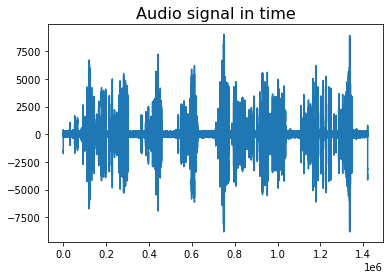

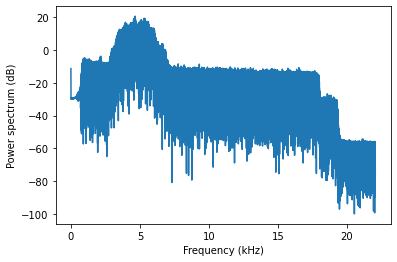

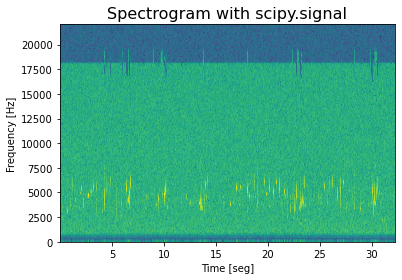

In [32]:
from scipy.io import wavfile # scipy library to read wav files
import numpy as np

AudioName = "All Birds WAV/Rose-Crested-Blue-Pipit-12122.wav" # Audio File
fs, Audiodata = wavfile.read(AudioName)

# Plot the audio signal in time
import matplotlib.pyplot as plt
plt.plot(Audiodata)
plt.title('Audio signal in time',size=16)

# spectrum
from scipy.fftpack import fft # fourier transform
n = len(Audiodata) 
AudioFreq = fft(Audiodata)
AudioFreq = AudioFreq[0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(AudioFreq) # Magnitude
MagFreq = MagFreq / float(n)
# power spectrum
MagFreq = MagFreq**2
if n % 2 > 0: # ffte odd 
    MagFreq[1:len(MagFreq)] = MagFreq[1:len(MagFreq)] * 2
else:# fft even
    MagFreq[1:len(MagFreq) -1] = MagFreq[1:len(MagFreq) - 1] * 2 

plt.figure()
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (fs / n);
plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq)) #Power spectrum
plt.xlabel('Frequency (kHz)'); plt.ylabel('Power spectrum (dB)');


#Spectrogram
from scipy import signal
N = 512 #Number of point in the fft
f, t, Sxx = signal.spectrogram(Audiodata, fs,window = signal.blackman(N),nfft=N)
plt.figure()
plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram
#plt.pcolormesh(t, f,Sxx) # Lineal spectrogram
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [seg]')
plt.title('Spectrogram with scipy.signal',size=16);

plt.show()

Early on, I was playing with WAY too many features, which had to be summarized too much for any meaningful results.

In [33]:

from librosa import feature

fn_list1 = [
    feature.chroma_stft,
    feature.spectral_centroid,
    feature.spectral_bandwidth,
    # feature.spectral_contrast,
    # feature.spectral_flatness,
    feature.spectral_rolloff,
    feature.melspectrogram
]
 
fn_list2 = [
    feature.rms,
    feature.spectral_contrast,
    feature.spectral_flatness,
    feature.zero_crossing_rate
]
def get_feature_vector(y,sr): 
    feat_vec_1 = [np.mean(funct(y,sr)) for funct in fn_list1]
    feat_vec_2 = [np.mean(funct(y)) for funct in fn_list2] 
    feature_vector = feat_vec_1 + feat_vec_2 
    return feature_vector


In [34]:
# # Still getting my head around this

# features = []

# for row in rcbp_A.values:
    
#     file = row[8]
# #     print(temp)
    
#     y, sr = librosa.load(file, sr = None)
#     feat_vec = get_feature_vector(y, sr)
#     features.append(feat_vec)
    
#     # print(y.shape)


In [35]:
# Now do some initial messing with the company files

In [36]:
# features_K = []

# for row in testBirds.values:
    
#     file = row[3]
# #     print(file)
    
#     y, sr = librosa.load(file, sr = None)
#     feat_vec = get_feature_vector(y, sr)
#     features_K.append(feat_vec)
    

In [37]:
# features_K

In [38]:
# K_feat = pd.DataFrame(features_K)

In [39]:
# K_feat

In [40]:
# K_feat.insert(0, "English_name", "Kasios")

In [41]:
# K_feat

In [42]:
# *******************************
# *******************************

# Load up the DF for the birds file

# *******************************
# *******************************

birds = pd.read_csv("Pauls_birds.csv")

In [43]:
## A restart.

# All the bird names
bird_names = list(allBirds['English_name'].unique())


In [44]:
bird_names

['Rose-crested Blue Pipit',
 'Blue-collared Zipper',
 'Bombadil',
 'Broad-winged Jojo',
 'Canadian Cootamum',
 'Carries Champagne Pipit',
 'Darkwing Sparrow',
 'Eastern Corn Skeet',
 'Green-tipped Scarlet Pipit',
 'Lesser Birchbeere',
 'Orange Pine Plover',
 'Ordinary Snape',
 'Pinkfinch',
 'Purple Tooting Tout',
 'Qax',
 'Queenscoat',
 'Bent-beak Riffraff',
 'Scrawny Jay',
 'Vermillion Trillian']

In [45]:
# Librosa is normalizing the data

For now, just MFCC was focused on.

In [46]:
# OK.  Now what.  Let's pull just the A songs for ALL species from the birds DF

# rcbp_A = allBirds.loc[(allBirds["English_name"] == 'Rose-crested Blue Pipit') &
#                               (allBirds["Quality"] == 'A')]

birds_A = birds.loc[(birds["Quality"] == 'A') &
                   (birds["Vocalization_type"] == 'song')]

In [47]:
birds_A

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y,mp3_path,wav_path
3,405548,Rose-Crested-Blue-Pipit,song,A,11:00,3/10/2018,55,125,All Birds/Rose-Crested-Blue-Pipit-405548.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-405548.wav
4,401782,Rose-Crested-Blue-Pipit,song,A,6:00,6/29/2008,129,123,All Birds/Rose-Crested-Blue-Pipit-401782.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-401782.wav
8,377874,Rose-Crested-Blue-Pipit,song,A,7:43,6/11/2000,134,118,All Birds/Rose-Crested-Blue-Pipit-377874.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-377874.wav
11,364567,Rose-Crested-Blue-Pipit,song,A,7:00,4/14/2017,124,121,All Birds/Rose-Crested-Blue-Pipit-364567.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-364567.wav
17,293914,Rose-Crested-Blue-Pipit,song,A,7:19,6/5/2015,142,114,All Birds/Rose-Crested-Blue-Pipit-293914.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-293914.wav
...,...,...,...,...,...,...,...,...,...,...
2009,139431,Vermillion-Trillian,song,A,6:46,6/20/2013,90,153,All Birds/Vermillion-Trillian-139431.mp3,All Birds WAV/Vermillion-Trillian-139431.wav
2011,137538,Vermillion-Trillian,song,A,8:27,6/1/2013,68,81,All Birds/Vermillion-Trillian-137538.mp3,All Birds WAV/Vermillion-Trillian-137538.wav
2013,18392,Vermillion-Trillian,song,A,11:13,3/9/2008,109,145,All Birds/Vermillion-Trillian-18392.mp3,All Birds WAV/Vermillion-Trillian-18392.wav
2014,18391,Vermillion-Trillian,song,A,10:21,3/9/2008,88,147,All Birds/Vermillion-Trillian-18391.mp3,All Birds WAV/Vermillion-Trillian-18391.wav


In [48]:
# That's 237 rows.  About 11%.  Give it a whirl...

In [49]:
# Feature files for initial testing PICKLED earlier.  Reloading here

featDF = pd.read_pickle("featDF.pkl")
featDF_K = pd.read_pickle("featDF_K.pkl")

In [50]:
# This is repeat block to pull the mfcc from the files.  Review the params.

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_best') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=100)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed

What is MFCC from Librosa:

From Wikipedia:
the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.[1] They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal spectrum. This frequency warping can allow for better representation of sound, for example, in audio compression.

MFCCs are commonly derived as follows:[2]

- Take the Fourier transform of (a windowed excerpt of) a signal.
- Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows or alternatively, cosine overlapping windows.
- Take the logs of the powers at each of the mel frequencies.
- Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
- The MFCCs are the amplitudes of the resulting spectrum.

In [51]:
# THE NUMBER of MFCC can be fiddled with ****. change in the block above

In [52]:
# Pull the MFCC feature from these files

# This one is just for the BP

features = []
# Iterate through each sound file and extract the features 
for index, row in tqdm(birds_A.iterrows()):
    file_name = row["wav_path"]
    class_label = row["English_name"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featDF_A = pd.DataFrame(features, columns=['feature','Bird'])

237it [08:05,  2.05s/it]


In [53]:
featDF_A

,feature,Bird
0,"[-484.8512, 94.95629, 37.473835, 40.556705, 1....",Rose-Crested-Blue-Pipit
1,"[-508.21097, -42.27922, -58.023067, 19.057116,...",Rose-Crested-Blue-Pipit
2,"[-517.44867, 37.147312, -12.801193, 17.133963,...",Rose-Crested-Blue-Pipit
3,"[-377.79, 76.12686, 27.736937, 26.72008, -10.3...",Rose-Crested-Blue-Pipit
4,"[-471.38977, -40.195263, -23.592304, 41.03469,...",Rose-Crested-Blue-Pipit
...,...,...
232,"[-512.5638, -3.1576781, -38.961254, -13.715375...",Vermillion-Trillian
233,"[-497.8491, -2.899008, -60.259567, 18.6079, 38...",Vermillion-Trillian
234,"[-418.01282, 87.57653, -61.26257, -35.0211, 4....",Vermillion-Trillian
235,"[-510.19965, 29.033638, -68.70875, 9.258407, 2...",Vermillion-Trillian


https://towardsdatascience.com/how-to-apply-machine-learning-and-deep-learning-methods-to-audio-analysis-615e286fcbbc

In [54]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featDF_A.feature.tolist())
y = np.array(featDF_A.Bird.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [55]:
y.shape

(237,)

In [56]:
X.shape

(237, 100)

In [57]:
yy.shape

(237, 17)

Due to constant rerunning, kernel blowups, and confusion among CSV and pickled files, I have dimension issues here.  Will comment the rest of this out.  The next notebook will show the beginnings of the feature extraction and model selection.

In [59]:
# Writing out intermediate steps.  Commenting out.

# birds.to_csv("Pauls_birds.csv", index=False)

Does it make sense to use all of the rows above as the train set, and use the Kasios files as the test set?  Try.

In [60]:
# X_test = np.array(featDF_K.feature.tolist())

Try other classifications!!

In [61]:
# X.shape

(237, 100)

In [62]:
# yy.shape

(237, 17)

In [63]:
# X_test.shape

(15, 40)

In [64]:
# so y is the english names.  yy is hot encoded.  can you classify that way?

In [65]:
# from sklearn.ensemble import RandomForestClassifier

# # clf = RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)
# clf.fit(X, y)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

In [66]:
# clf.predict(X_test)

ValueError: X has 40 features, but RandomForestClassifier is expecting 100 features as input.

In [ ]:
# Six of the 15, with some tweaked params

In [ ]:
# SVC

# from sklearn.svm import SVC

In [ ]:
# clf = SVC(gamma='auto')
# clf.fit(X, y)

In [ ]:
# clf.predict(X_test)

In [ ]:
# SVC with default params.  Not smart.

In [ ]:
# Repeat all that on the whole file!

In [ ]:
# Pull the MFCC feature from these files

# ALL BIRDS !!

# features = []
# # Iterate through each sound file and extract the features 
# for index, row in tqdm(birds.iterrows()):
#     file_name = row["wav_path"]
#     class_label = row["English_name"]
#     data = extract_features(file_name)
    
#     features.append([data, class_label])

# # Convert into a Panda dataframe 
# featDF = pd.DataFrame(features, columns=['feature','Bird'])

In [ ]:
# # Convert features and corresponding classification labels into numpy arrays
# X = np.array(featDF.feature.tolist())
# y = np.array(featDF.Bird.tolist())

# # Encode the classification labels
# le = LabelEncoder()
# yy = to_categorical(le.fit_transform(y))

In [ ]:
# Random Forest on the whole file

# clf = RandomForestClassifier(random_state=42)   
# clf.fit(X, y)
# clf.predict(X_test)

In [ ]:
# A non-tuned RFC with default params thinks 6 of the Kasios files are RCBP

In [ ]:
# For snicks, try the SVC again:

In [ ]:
# clf = SVC(gamma='auto')
# clf.fit(X, y)
# clf.predict(X_test)

In [ ]:
# Different bird, but same sort of result.  Hmm?  Think about what SVC is doing?

In [ ]:
# from sklearn.neural_network import MLPClassifier

In [ ]:
# clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,), max_iter = 1000, random_state=42)

In [ ]:
# clf.fit(X, y)
# clf.predict(X_test)

In [ ]:
# ONE RCBP

These models, working on a single summarized feature, were all over the map.  Certainly, the MLP showed the greatest promise, in terms of results, but I want to get multiple features in to the dataset that is run through a classifier.

In [ ]:
# type(featDF)

In [ ]:
# featDF.to_pickle("featDF.pkl")

In [ ]:
# type(featDF_K)

In [ ]:
# featDF_K.to_pickle("featDF_K.pkl")

In [ ]:
# To read the pickled DF:

# unpickledDF = pd.read_pickle("filename.pkl")

In [ ]:
# featDF = pd.read_pickle("featDF.pkl")
# featDF_K = pd.read_pickle("featDF_K.pkl")

At this point, my kernel began to blow up on a regular basis.  I started a new notebook.